<a href="https://colab.research.google.com/github/Ali-ElGamal/DataAnalysisProjects/blob/main/ML_CW_Credit_Score_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First we Import necessary libraries

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [270]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

<ipython-input-270-c32ee6ec00a2>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


In [271]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [272]:
print(df.head())

       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     C

In [273]:
print(df.isnull().sum())

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


In [274]:
df.duplicated().sum()

0

In [275]:
df.sample(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8128,0x45a2,CUS_0x8e38,January,Lucyx,40,597-58-5834,Entrepreneur,74499.6,5910.300000,6,...,Standard,235.27,32.297992,19 Years and 4 Months,Yes,171.145712,211.8356582230355,High_spent_Medium_value_payments,458.04862952674523,Standard
48971,0x134f1,CUS_0x87d5,April,N.w,39,737-08-2499,Writer,16582.94,NaN,9,...,_,3824.03,35.090735,7 Years and 1 Months,Yes,88.646681,__10000__,Low_spent_Small_value_payments,193.01459066349042,Poor
13608,0x65be,CUS_0x906e,January,Sinead Cruiseo,20,615-78-0586,_______,39608.9,3503.741667,6,...,Bad,2947.72,29.259366,13 Years and 10 Months,Yes,220.661473,__10000__,High_spent_Small_value_payments,269.4708968582756,Poor
33283,0xd905,CUS_0x58f7,April,Sinead Cruisel,44,890-01-3579,Doctor,81066.72_,6639.560000,8,...,_,721.45,22.270378,29 Years and 5 Months,Yes,170.829327,401.35900899207513,High_spent_Small_value_payments,351.76766356061637,Good
87156,0x214ae,CUS_0xa219,May,Michael Taylorz,37,#F%$D@*&8,Engineer,14698.595,1505.882917,8,...,Standard,469.46,37.041074,12 Years and 2 Months,Yes,84.873187,197.88994854761032,Low_spent_Small_value_payments,157.82515655448108,Standard
52954,0x14c48,CUS_0x6ef6,March,Lefteris Papadimasl,49,620-43-0108,Manager,122178.93,9778.753303,5,...,Good,1314.14,37.281556,28 Years and 1 Months,No,519.754140,109.21353543109487,High_spent_Large_value_payments,926.4142718044408,Good
51270,0x14268,CUS_0x1bac,July,Wolfo,29,469-12-4672,Engineer,15926.285,1591.190417,4,...,Standard,1481.35,30.925978,NaN,Yes,14.817007,156.98838322083276,Low_spent_Small_value_payments,277.3136517673364,Standard
65623,0x19681,CUS_0x6324,August,Nicholas Vinocurr,55,342-38-4793,Manager,32933.44,2574.453333,5,...,Good,1272.85,31.949003,29 Years and 0 Months,No,95.116802,88.21831060992788,Low_spent_Small_value_payments,364.1102205160649,Standard
14486,0x6ae0,CUS_0xbc06,July,Scott Maloned,22_,095-45-2407,Writer,9446.245,995.187083,6,...,Standard,1689.51,30.706905,19 Years and 5 Months,NM,38.220672,68.60964288496736,Low_spent_Small_value_payments,282.68839376699015,Poor
74114,0x1c844,CUS_0x8b7c,March,Drivern,38,315-96-1253,Scientist,73826.31,NaN,3,...,Standard,442.03,39.447827,30 Years and 3 Months,NM,170.653258,71.77916243115956,High_spent_Medium_value_payments,600.486829489629,Standard


In [276]:
df['Name'].fillna('Unknown', inplace=True)
df['Type_of_Loan'].fillna('Unknown', inplace=True)

In [277]:
df['Monthly_Inhand_Salary'] = pd.to_numeric(df['Monthly_Inhand_Salary'], errors='coerce')
df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median(), inplace=True)
df['Monthly_Inhand_Salary'].head()

0    1824.843333
1    3093.745000
2    3093.745000
3    3093.745000
4    1824.843333
Name: Monthly_Inhand_Salary, dtype: float64

In [278]:
numerical_columns = ['Amount_invested_monthly', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_History_Age', 'Monthly_Balance','Changed_Credit_Limit','Num_of_Delayed_Payment']

# Process each column
for column in numerical_columns:
    # Convert to numeric
    df[column] = pd.to_numeric(df[column], errors='coerce')

    # Fill missing values with the median
    df[column].fillna(df[column].median(), inplace=True)


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [279]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')


In [280]:
df['Payment_Behaviour'].sample(10)

59893      Low_spent_Large_value_payments
52765      Low_spent_Small_value_payments
92138      Low_spent_Small_value_payments
73312      Low_spent_Small_value_payments
53818                              !@9#%8
89283    High_spent_Medium_value_payments
46582     High_spent_Small_value_payments
78253     High_spent_Small_value_payments
65547     High_spent_Large_value_payments
57499      Low_spent_Small_value_payments
Name: Payment_Behaviour, dtype: object

In [281]:
# Replace unusual values with NaN
df['Payment_Behaviour'].replace('!@9#%8', np.nan, inplace=True)

# Convert the column to numeric (assuming it's categorical)
df['Payment_Behaviour'] = pd.to_numeric(df['Payment_Behaviour'], errors='coerce')

# Impute missing values with the median
median_payment_behavior = df['Payment_Behaviour'].median()
df['Payment_Behaviour'].fillna(median_payment_behavior, inplace=True)


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [282]:
df['Payment_Behaviour'].sample(10)

53419   NaN
71940   NaN
73603   NaN
94107   NaN
12160   NaN
49458   NaN
62810   NaN
20095   NaN
91760   NaN
39497   NaN
Name: Payment_Behaviour, dtype: float64

In [283]:
df = df.drop(columns=['ID', 'Name', 'SSN'])


In [284]:
numeric_columns = ['Age', 'Annual_Income', 'Num_of_Loan','Amount_invested_monthly', 'Outstanding_Debt', 'Credit_Mix', 'Monthly_Balance']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [285]:
df['Num_Credit_Card'] = df['Num_Credit_Card'].replace(0, df['Num_Credit_Card'].median())


In [286]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x: x if x >= 0 else df['Num_Bank_Accounts'].median())


In [287]:
df['Type_of_Loan'] = label_encoder.fit_transform(df['Type_of_Loan'])


In [288]:
# Encoding categorical columns
label_encoder = LabelEncoder()
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])


In [289]:
# Example: Extract year, month, day
df['Credit_History_Year'] = pd.to_datetime(df['Credit_History_Age']).dt.year


In [290]:
# Display the shape of the cleaned dataframe
print("Original DataFrame Shape:", df.shape)

Original DataFrame Shape: (100000, 26)


In [291]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x: abs(x) if x < 0 else x)


In [292]:
# Display the first 5 rows of the cleaned DataFrame
print(df.head())


  Customer_ID     Month    Age  Occupation  Annual_Income  \
0   CUS_0xd40   January   23.0          12       19114.12   
1   CUS_0xd40  February   23.0          12       19114.12   
2   CUS_0xd40     March -500.0          12       19114.12   
3   CUS_0xd40     April   23.0          12       19114.12   
4   CUS_0xd40       May   23.0          12       19114.12   

   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0            1824.843333                3.0                4              3   
1            3093.745000                3.0                4              3   
2            3093.745000                3.0                4              3   
3            3093.745000                3.0                4              3   
4            1824.843333                3.0                4              3   

   Num_of_Loan  ...  Outstanding_Debt  Credit_Utilization_Ratio  \
0          4.0  ...            809.98                 26.822620   
1          4.0  ...     

In [293]:
salary_cap = df['Monthly_Inhand_Salary'].quantile(0.99)
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].apply(lambda x: salary_cap if x > salary_cap else x)

In [294]:
df = pd.get_dummies(df, columns=['Payment_Behaviour'])

In [295]:
df['Has_Credit_History_Age'] = df['Credit_History_Age'].apply(lambda x: 1 if x > 0 else 0)

In [296]:
df = df.drop(columns=['Customer_ID', 'Credit_History_Year'])

In [297]:
print(df.head())

      Month    Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0   January   23.0          12       19114.12            1824.843333   
1  February   23.0          12       19114.12            3093.745000   
2     March -500.0          12       19114.12            3093.745000   
3     April   23.0          12       19114.12            3093.745000   
4       May   23.0          12       19114.12            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                3.0                4              3          4.0   
1                3.0                4              3          4.0   
2                3.0                4              3          4.0   
3                3.0                4              3          4.0   
4                3.0                4              3          4.0   

   Type_of_Loan  ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0           128  ...         NaN            809.98                 26.82

In [298]:
df.describe()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Has_Credit_History_Age
count,95061.000000,100000.000000,9.302000e+04,100000.000000,100000.000000,100000.00000,100000.000000,95215.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,0.0,98991.000000,100000.000000,0.0,100000.000000,100000.000000,100000.000000,100000.0
mean,110.934505,7.523380,1.785790e+05,4021.482489,17.092750,22.47508,72.466040,2.780339,3513.769280,21.068780,...,10.368345,27.326780,NaN,1426.503700,32.285173,NaN,1403.118217,189.690637,401.755494,0.0
std,689.407864,4.640296,1.442878e+06,2935.436190,117.404652,129.05731,466.422621,62.500940,1975.132865,14.860104,...,6.719627,191.293766,NaN,1155.045753,5.116875,NaN,8306.041270,191.527772,212.750017,0.0
min,-500.000000,0.000000,7.005930e+03,303.645417,0.000000,1.00000,1.000000,-100.000000,0.000000,-5.000000,...,-6.490000,0.000000,NaN,0.230000,20.000000,NaN,0.000000,0.000000,0.007760,0.0
25%,24.000000,4.000000,1.943560e+04,1792.084167,3.000000,4.00000,8.000000,1.000000,1777.750000,10.000000,...,5.420000,3.000000,NaN,566.080000,28.052567,NaN,30.306660,77.017414,270.913865,0.0
50%,33.000000,7.000000,3.755074e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,3463.000000,18.000000,...,9.400000,6.000000,NaN,1166.370000,32.305784,NaN,69.249473,128.954538,336.731225,0.0
75%,42.000000,12.000000,7.284338e+04,5371.525000,7.000000,7.00000,20.000000,5.000000,5385.250000,28.000000,...,14.660000,9.000000,NaN,1948.200000,36.496663,NaN,161.224249,220.039055,467.670597,0.0
max,8698.000000,15.000000,2.419806e+07,13580.730000,1798.000000,1499.00000,5797.000000,1496.000000,6260.000000,67.000000,...,36.970000,2597.000000,NaN,4998.070000,50.000000,NaN,82331.000000,1977.326102,1602.040519,0.0


In [299]:
# Replace invalid age values with NaN
df['Age'] = df['Age'].apply(lambda x: x if 18 <= x <= 100 else None)

# Impute missing or NaN values in the 'Age' column
df['Age'].fillna(df['Age'].median(), inplace=True)

# Display a subset of the DataFrame to verify changes
print(df[['Age']].head())


    Age
0  23.0
1  23.0
2  34.0
3  23.0
4  23.0


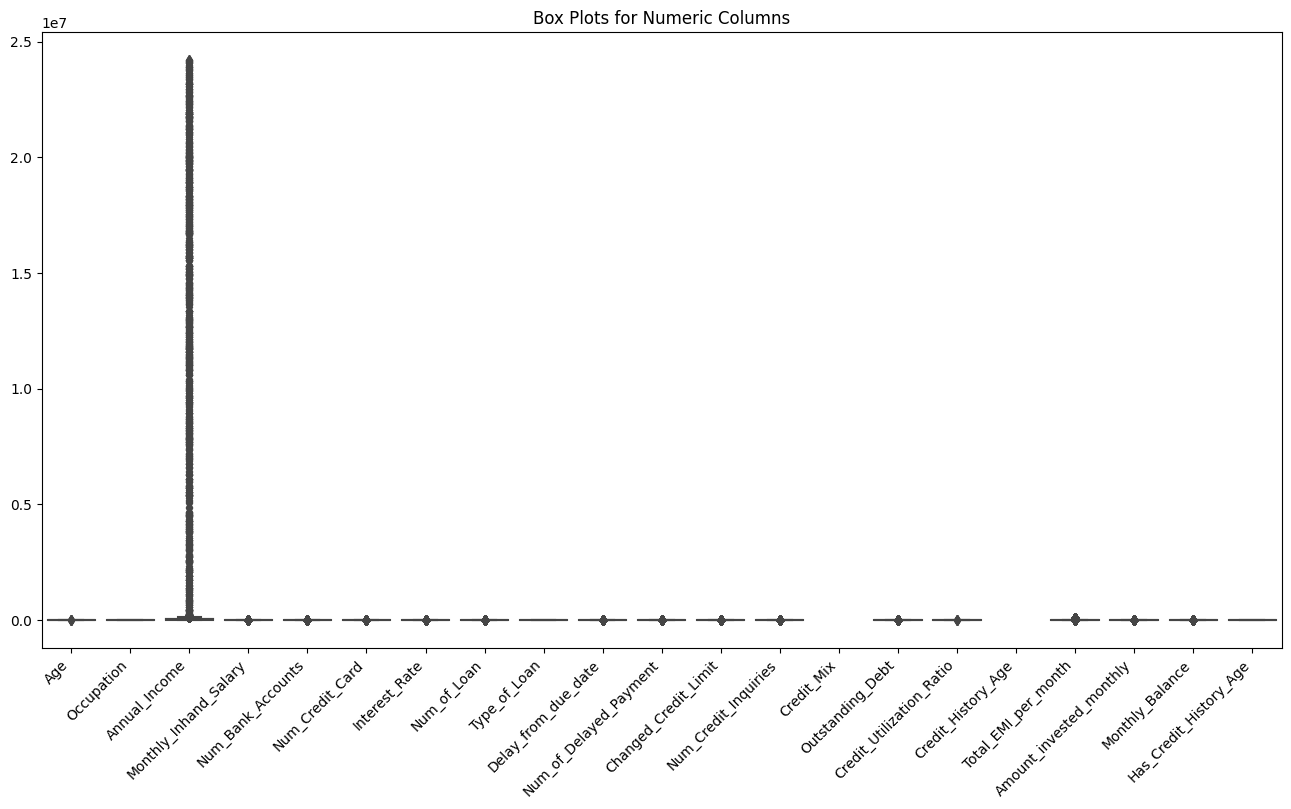

In [300]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create box plots for numeric columns
plt.figure(figsize=(16, 8))
sns.boxplot(data=df[numeric_columns])
plt.title('Box Plots for Numeric Columns')
plt.xticks(rotation=45, ha='right')
plt.show()

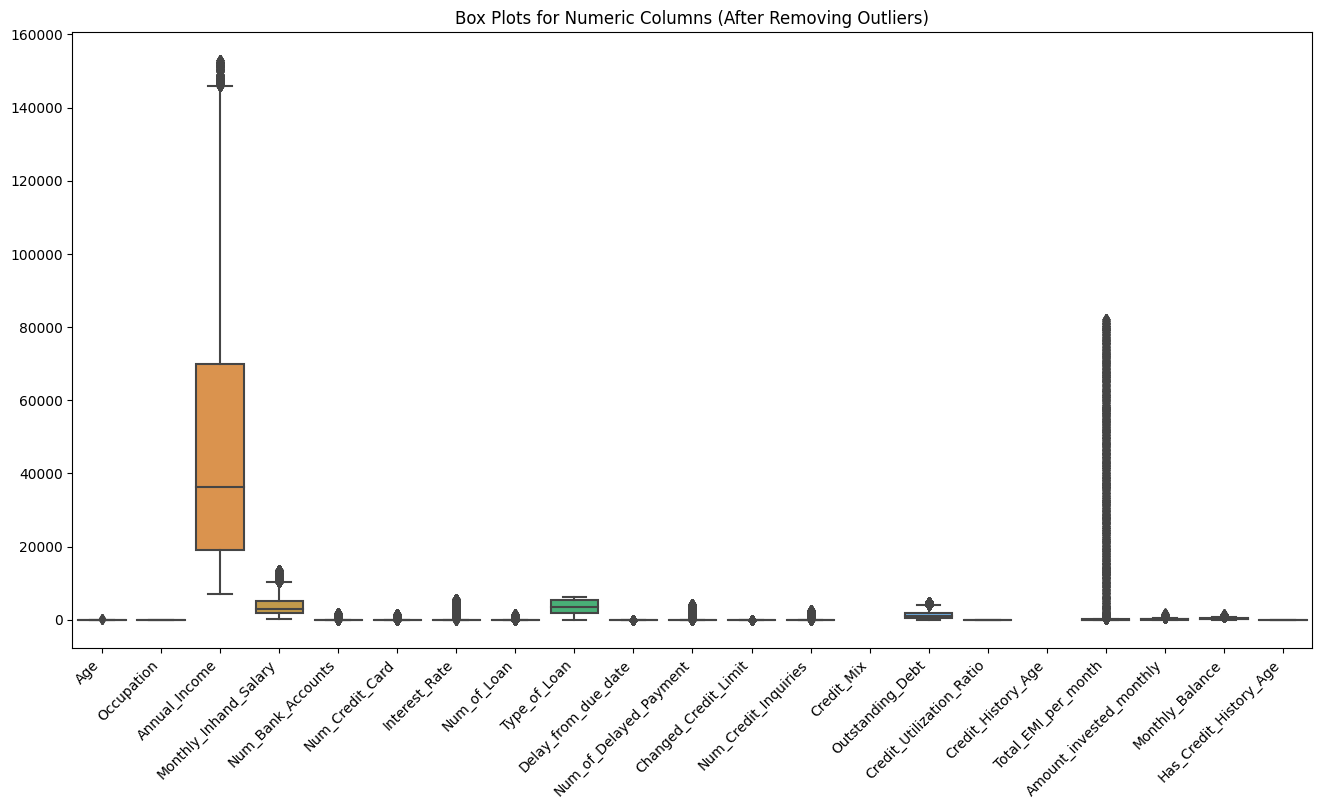

In [301]:
# Calculate the IQR for the 'Annual_Income' column
Q1 = df['Annual_Income'].quantile(0.25)
Q3 = df['Annual_Income'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df['Annual_Income'] < lower_bound) | (df['Annual_Income'] > upper_bound)

# Remove outliers
df = df[~outliers].copy()

# Display box plot after removing outliers
plt.figure(figsize=(16, 8))
sns.boxplot(data=df[numeric_columns])
plt.title('Box Plots for Numeric Columns (After Removing Outliers)')
plt.xticks(rotation=45, ha='right')
plt.show()


In [302]:
df.describe()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Has_Credit_History_Age
count,97438.000000,97438.000000,90458.000000,97438.000000,97438.000000,97438.000000,97438.000000,92770.000000,97438.000000,97438.000000,...,97438.000000,97438.000000,0.0,96450.000000,97438.000000,0.0,97438.000000,97438.000000,97438.000000,97438.0
mean,34.356770,7.530501,48370.116233,3893.043616,17.142521,22.457542,73.128502,2.811965,3511.050545,21.275724,...,10.434606,27.313317,NaN,1437.707235,32.227859,NaN,1400.235772,183.633029,393.714255,0.0
std,9.422797,4.639446,35191.331168,2740.259127,117.507593,128.899775,469.094851,62.652073,1974.588205,14.880821,...,6.731433,191.130599,NaN,1159.069908,5.089446,NaN,8297.022158,179.258714,199.351746,0.0
min,18.000000,0.000000,7005.930000,303.645417,0.000000,1.000000,1.000000,-100.000000,0.000000,-5.000000,...,-6.490000,0.000000,NaN,0.230000,20.000000,NaN,0.000000,0.000000,0.007760,0.0
25%,27.000000,4.000000,19197.300000,1770.570000,4.000000,4.000000,8.000000,1.000000,1774.000000,10.000000,...,5.500000,3.000000,NaN,572.550000,28.007945,NaN,30.095071,76.129821,270.137284,0.0
50%,34.000000,7.000000,36379.240000,3093.745000,6.000000,6.000000,14.000000,3.000000,3463.000000,18.000000,...,9.400000,6.000000,NaN,1176.770000,32.250979,NaN,68.117431,128.954538,336.550122,0.0
75%,41.000000,12.000000,69857.985000,5229.463333,8.000000,7.000000,20.000000,5.000000,5377.000000,28.000000,...,14.790000,9.000000,NaN,1969.760000,36.445671,NaN,157.217426,214.443553,459.791023,0.0
max,100.000000,15.000000,152947.120000,13580.730000,1798.000000,1499.000000,5797.000000,1496.000000,6260.000000,67.000000,...,36.970000,2597.000000,NaN,4998.070000,48.337291,NaN,82331.000000,1733.700474,1576.288935,0.0


In [303]:
df.sample(10)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Has_Credit_History_Age
76761,February,26.0,3,80673.30,6822.775000,7.0,4,7,4.0,2486,...,NaN,326.98,38.010198,NaN,Yes,176.278910,105.489742,650.508848,Standard,0
58608,January,34.0,0,54174.51,4236.542500,6.0,6,18,7.0,5461,...,NaN,2236.88,29.455296,NaN,NM,226.640384,82.778004,364.235862,Standard,0
63180,May,33.0,8,44264.41,3755.700833,3.0,3,6,2.0,6259,...,NaN,1312.23,31.959359,NaN,No,40.482424,136.325574,448.762085,Standard,0
55894,July,32.0,2,60878.97,5173.247500,4.0,6,12,5.0,3778,...,NaN,946.64,38.816148,NaN,Yes,158.322088,71.186481,527.816181,Standard,0
32605,June,34.0,1,46152.92,4058.076667,3.0,3,7,4.0,2474,...,NaN,1294.20,27.934096,NaN,Yes,147.963783,354.855026,192.988858,Standard,0
74825,February,23.0,6,43493.93,3516.494167,4.0,2,4,0.0,6260,...,NaN,621.24,25.135321,NaN,No,0.000000,128.954538,487.932334,Standard,0
90141,June,26.0,1,118236.03,9882.002500,4.0,5,8,0.0,6260,...,NaN,699.62,30.476863,NaN,No,0.000000,128.954538,1061.573288,Standard,0
96382,July,25.0,7,35239.54,2807.628333,9.0,6,16,9.0,6200,...,NaN,3210.75,26.187319,NaN,Yes,199.712775,296.368295,74.681764,Standard,0
73547,April,30.0,9,80541.51,6460.792500,4.0,7,20,0.0,6260,...,NaN,345.22,36.168328,NaN,Yes,0.000000,163.154391,742.924859,Standard,0
59443,April,48.0,13,NaN,3168.096667,7.0,5,7,1.0,2100,...,NaN,1271.82,34.917607,NaN,No,23.008120,128.954538,414.454552,Standard,0


In [304]:
df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x: x if x >= 0 else np.nan)
df['Delay_from_due_date'] = df['Delay_from_due_date'].apply(lambda x: x if x >= 0 else np.nan)

# Fill missing values with the median
df['Num_of_Loan'].fillna(df['Num_of_Loan'].median(), inplace=True)
df['Delay_from_due_date'].fillna(df['Delay_from_due_date'].median(), inplace=True)


In [306]:
# Replace negative values with NaN in 'Changed_Credit_Limit'
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].apply(lambda x: np.nan if x < 0 else x)

# Convert the column to numeric
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')

# Impute missing values with the median
median_credit_limit = df['Changed_Credit_Limit'].median()
df['Changed_Credit_Limit'].fillna(median_credit_limit, inplace=True)


In [307]:
df.describe()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Has_Credit_History_Age
count,97438.000000,97438.000000,90458.000000,97438.000000,97438.000000,97438.000000,97438.000000,97438.000000,97438.000000,97438.000000,...,97438.000000,97438.000000,0.0,96450.000000,97438.000000,0.0,97438.000000,97438.000000,97438.000000,97438.0
mean,34.356770,7.530501,48370.116233,3893.043616,17.142521,22.457542,73.128502,6.826259,3511.050545,21.390566,...,10.617900,27.313317,NaN,1437.707235,32.227859,NaN,1400.235772,183.633029,393.714255,0.0
std,9.422797,4.639446,35191.331168,2740.259127,117.507593,128.899775,469.094851,57.533251,1974.588205,14.776520,...,6.534974,191.130599,NaN,1159.069908,5.089446,NaN,8297.022158,179.258714,199.351746,0.0
min,18.000000,0.000000,7005.930000,303.645417,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,0.230000,20.000000,NaN,0.000000,0.000000,0.007760,0.0
25%,27.000000,4.000000,19197.300000,1770.570000,4.000000,4.000000,8.000000,2.000000,1774.000000,10.000000,...,5.810000,3.000000,NaN,572.550000,28.007945,NaN,30.095071,76.129821,270.137284,0.0
50%,34.000000,7.000000,36379.240000,3093.745000,6.000000,6.000000,14.000000,3.000000,3463.000000,18.000000,...,9.420000,6.000000,NaN,1176.770000,32.250979,NaN,68.117431,128.954538,336.550122,0.0
75%,41.000000,12.000000,69857.985000,5229.463333,8.000000,7.000000,20.000000,5.000000,5377.000000,28.000000,...,14.790000,9.000000,NaN,1969.760000,36.445671,NaN,157.217426,214.443553,459.791023,0.0
max,100.000000,15.000000,152947.120000,13580.730000,1798.000000,1499.000000,5797.000000,1496.000000,6260.000000,67.000000,...,36.970000,2597.000000,NaN,4998.070000,48.337291,NaN,82331.000000,1733.700474,1576.288935,0.0


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Occupation'].plot(kind='hist', bins=20, title='Occupation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Annual_Income'].plot(kind='hist', bins=20, title='Annual_Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Monthly_Inhand_Salary'].plot(kind='hist', bins=20, title='Monthly_Inhand_Salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Age', y='Occupation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Occupation', y='Annual_Income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Annual_Income', y='Monthly_Inhand_Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Monthly_Inhand_Salary', y='Num_Bank_Accounts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Delay_from_due_date']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Delay_from_due_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Delay_from_due_date')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Delay_from_due_date']
  ys = series['Occupation']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Delay_from_due_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Delay_from_due_date')
_ = plt.ylabel('Occupation')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Delay_from_due_date']
  ys = series['Annual_Income']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Delay_from_due_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Delay_from_due_date')
_ = plt.ylabel('Annual_Income')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Delay_from_due_date']
  ys = series['Monthly_Inhand_Salary']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Delay_from_due_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Delay_from_due_date')
_ = plt.ylabel('Monthly_Inhand_Salary')

from matplotlib import pyplot as plt
_df_12['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Occupation'].plot(kind='line', figsize=(8, 4), title='Occupation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Annual_Income'].plot(kind='line', figsize=(8, 4), title='Annual_Income')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Monthly_Inhand_Salary'].plot(kind='line', figsize=(8, 4), title='Monthly_Inhand_Salary')
plt.gca().spines[['top', 'right']].set_visible(False)

In [308]:
df.drop(columns=['Has_Credit_History_Age'], inplace=True)

In [309]:
df.describe()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,97438.000000,97438.000000,90458.000000,97438.000000,97438.000000,97438.000000,97438.000000,97438.000000,97438.000000,97438.000000,97438.000000,97438.000000,97438.000000,0.0,96450.000000,97438.000000,0.0,97438.000000,97438.000000,97438.000000
mean,34.356770,7.530501,48370.116233,3893.043616,17.142521,22.457542,73.128502,6.826259,3511.050545,21.390566,29.369425,10.617900,27.313317,NaN,1437.707235,32.227859,NaN,1400.235772,183.633029,393.714255
std,9.422797,4.639446,35191.331168,2740.259127,117.507593,128.899775,469.094851,57.533251,1974.588205,14.776520,214.789078,6.534974,191.130599,NaN,1159.069908,5.089446,NaN,8297.022158,179.258714,199.351746
min,18.000000,0.000000,7005.930000,303.645417,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,NaN,0.230000,20.000000,NaN,0.000000,0.000000,0.007760
25%,27.000000,4.000000,19197.300000,1770.570000,4.000000,4.000000,8.000000,2.000000,1774.000000,10.000000,10.000000,5.810000,3.000000,NaN,572.550000,28.007945,NaN,30.095071,76.129821,270.137284
50%,34.000000,7.000000,36379.240000,3093.745000,6.000000,6.000000,14.000000,3.000000,3463.000000,18.000000,14.000000,9.420000,6.000000,NaN,1176.770000,32.250979,NaN,68.117431,128.954538,336.550122
75%,41.000000,12.000000,69857.985000,5229.463333,8.000000,7.000000,20.000000,5.000000,5377.000000,28.000000,18.000000,14.790000,9.000000,NaN,1969.760000,36.445671,NaN,157.217426,214.443553,459.791023
max,100.000000,15.000000,152947.120000,13580.730000,1798.000000,1499.000000,5797.000000,1496.000000,6260.000000,67.000000,4397.000000,36.970000,2597.000000,NaN,4998.070000,48.337291,NaN,82331.000000,1733.700474,1576.288935


In [310]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: max(0, x))
print(df['Num_of_Delayed_Payment'].describe())


count    97438.000000
mean        29.379195
std        214.787697
min          0.000000
25%         10.000000
50%         14.000000
75%         18.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64


In [311]:
df.describe()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,97438.000000,97438.000000,90458.000000,97438.000000,97438.000000,97438.000000,97438.000000,97438.000000,97438.000000,97438.000000,97438.000000,97438.000000,97438.000000,0.0,96450.000000,97438.000000,0.0,97438.000000,97438.000000,97438.000000
mean,34.356770,7.530501,48370.116233,3893.043616,17.142521,22.457542,73.128502,6.826259,3511.050545,21.390566,29.379195,10.617900,27.313317,NaN,1437.707235,32.227859,NaN,1400.235772,183.633029,393.714255
std,9.422797,4.639446,35191.331168,2740.259127,117.507593,128.899775,469.094851,57.533251,1974.588205,14.776520,214.787697,6.534974,191.130599,NaN,1159.069908,5.089446,NaN,8297.022158,179.258714,199.351746
min,18.000000,0.000000,7005.930000,303.645417,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.230000,20.000000,NaN,0.000000,0.000000,0.007760
25%,27.000000,4.000000,19197.300000,1770.570000,4.000000,4.000000,8.000000,2.000000,1774.000000,10.000000,10.000000,5.810000,3.000000,NaN,572.550000,28.007945,NaN,30.095071,76.129821,270.137284
50%,34.000000,7.000000,36379.240000,3093.745000,6.000000,6.000000,14.000000,3.000000,3463.000000,18.000000,14.000000,9.420000,6.000000,NaN,1176.770000,32.250979,NaN,68.117431,128.954538,336.550122
75%,41.000000,12.000000,69857.985000,5229.463333,8.000000,7.000000,20.000000,5.000000,5377.000000,28.000000,18.000000,14.790000,9.000000,NaN,1969.760000,36.445671,NaN,157.217426,214.443553,459.791023
max,100.000000,15.000000,152947.120000,13580.730000,1798.000000,1499.000000,5797.000000,1496.000000,6260.000000,67.000000,4397.000000,36.970000,2597.000000,NaN,4998.070000,48.337291,NaN,82331.000000,1733.700474,1576.288935
